# Data Description:

A research group at UBC has been collecting data on a Minecraft server to try to learn more about how people play games. They have provided some data for students to analyze. 
  
There were two datasets given:
- players.csv
- sessions.csv

In players.csv, the table contains a list of all unique players to play their Minecraft server.  
This table contains the following seven columns:
- `experience` - Amount of previous playtime
- `subscribe` - True if the user is subscribed to a Gaming Related Newsletter
- `hashedEmail` - Hidden email address of the user
- `played_hours` - Hours played on their Minecraft server
- `name`, `gender`, `age` - Basic demographic information  
  
There are 196 registered players in the dataset.

In sessions.csv, the table consists of a list of all individual play sessions.  
This table contains the following five columns:
- `hashedEmail` - Same hashed email used in players.csv
- `start_time` - Start date and time
- `end_time` - End date and time
- `original_start_time`, `original_end_time` - Likely times that got converted into `start_time` and `end_time`
  
There are 1535 playing sessions in the dataset.

There are still some potential issues with this dataset:
- Self reported demographics and experience may not be accurate
- The restriction on age can remove some possible player data
- People may create multiple accounts
- End time may not be accurate if the user leaves the tab open
- The gaming newsletter may not be specific to what the user likes

## Summary statistics:  

To obtain the summary statistics, we must first load the R libraries and settings.

In [3]:
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)
library(lubridate)
# library(tidyr)
options(repr.matrix.max.rows = 7)
options(repr.plot.height = 8, repr.plot.width = 10)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Then, by reading the datasets out to variables, we can mutate the data to more descriptive categorical data. In sessions, we also want to seperate the dates and times into seperate columns, then transform the dates into a date format for later calculations.  
It is now easier to find the summary statistics of both tables.

In [4]:
sessions <- read_csv("sessions.csv")
players <- read_csv("players.csv")
players <- players |>
    mutate(experience = as_factor(experience), subscribe = as_factor(subscribe), gender = as_factor(gender)) |>
    mutate(subscribe = fct_recode(subscribe, "Yes" = "TRUE", "No" = "FALSE"))
sessions <- sessions |>
    mutate(start_time=as_datetime(parse_date_time(start_time, orders = "dmy HM"))) |>
    mutate(end_time=as_datetime(parse_date_time(end_time, orders = "dmy HM")))
sessions
players

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<dttm>,<dttm>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-25 03:22:00,2024-07-25 03:58:00,1.72188e+12,1.72188e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-28 15:36:00,2024-07-28 15:57:00,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-25 06:15:00,2024-07-25 06:22:00,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-20 02:26:00,2024-05-20 02:45:00,1.71617e+12,1.71617e+12


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,Yes,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,Yes,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,No,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,Yes,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,No,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,No,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,Yes,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


We can see from the above tables that there are 1535 recorded playing sessions and 196 registered users in this dataset.  
  
Next, we are going to focus on the categorical data. By using `group_by` and `summarize`, we can find the counts for all people with different experience, whether they are subscribed, and different genders. Using `arrange` to sort by descending, we can see the most common value.

In [5]:
experience_count <- players |>
    group_by(experience) |>
    summarize(count = n()) |>
    arrange(-count)
subscribed_count <- players |>
    group_by(subscribe) |>
    summarize(count = n()) |>
    arrange(-count)
gender_count <- players |>
    group_by(gender) |>
    summarize(count = n()) |>
    arrange(-count)
experience_count
subscribed_count
gender_count

experience,count
<fct>,<int>
Amateur,63
Veteran,48
Regular,36
Beginner,35
Pro,14


subscribe,count
<fct>,<int>
Yes,144
No,52


gender,count
<fct>,<int>
Male,124
Female,37
Non-binary,15
Prefer not to say,11
Two-Spirited,6
Agender,2
Other,1


From these three tables, we can determine that:
- 63/196 ≈ 32% of all players are Amateur (Described on website as "Played a few hours of Minecraft")
- 144/196 ≈ 73% are subscribed to the newsletter
- 124/196 ≈ 63% of all players are Male  
  
The next statistics we will look at is are the numeric ones, playtime and age. By using `arrange` and `summarize`, we can find various measurements, including maximum, minimum, standard deviation, etc.

In [6]:
playtime <- players |>
    select(played_hours) |>
    arrange(played_hours)
max_playtime <- playtime |>
    arrange(-played_hours) |>
    slice(1) |>
    pull()
min_playtime <- playtime |>
    slice(1) |>
    pull()
mean_playtime <- playtime |>
    summarize(mean = mean(played_hours)) |>
    pull()
median_playtime <- playtime |>
    summarize(median = median(played_hours)) |>
    pull()
sd_playtime <- playtime |>
    summarize(sd = sd(played_hours)) |>
    pull()
max_playtime
min_playtime
round(mean_playtime, digits = 2)
round(median_playtime, digits = 2)
round(sd_playtime, digits = 2)

[1] 223.1

[1] 0

[1] 5.85

[1] 0.1

[1] 28.36

In [7]:
age <- players |>
    select(Age) |>
    arrange(Age)
max_age <- age |>
    arrange(-Age) |>
    slice(1) |>
    pull()
min_age <- age |>
    slice(1) |>
    pull()
mean_age <- age |>
    summarize(mean = mean(Age, na.rm = TRUE)) |>
    pull()
median_age <- age |>
    summarize(median = median(Age, na.rm = TRUE),) |>
    pull()
sd_age <- age |>
    summarize(sd = sd(Age, na.rm = TRUE)) |>
    pull()
max_age
min_age
round(mean_age, digits = 2)
round(median_age, digits = 2)
round(sd_age, digits = 2)

[1] 50

[1] 8

[1] 20.52

[1] 19

[1] 6.17

| Method | Hours of Playtime | Age |
| ------ | ------ | ------ |
| Max    | 223.1  | 50 |
| Min    | 0      | 8 |
| Mean   | 5.85   | 20.52 |
| Median | 0.1    | 19 |
| SD     | 28.36  | 6.17 |

The final columns to look at are the start and end times. This includes both the original times, which seem to be represented in Unix time before conversion into a standard datetime format. As no timezone is indicated, the code will produce a result in UTC.

In [8]:
min_start <- sessions |>
    summarize(time=min(start_time, na.rm=TRUE)) |>
    pull()
max_start <- sessions |>
    summarize(time=max(start_time, na.rm=TRUE)) |>
    pull()
mean_start <- sessions |>
    summarize(time=mean(start_time, na.rm=TRUE)) |>
    pull()
median_start <- sessions |>
    summarize(median = median(start_time, na.rm = TRUE),) |>
    pull()
min_start
max_start
mean_start
median_start
min_end <- sessions |>
    summarize(time=min(end_time, na.rm=TRUE)) |>
    pull()
max_end <- sessions |>
    summarize(time=max(end_time, na.rm=TRUE)) |>
    pull()
mean_end <- sessions |>
    summarize(time=mean(end_time, na.rm=TRUE)) |>
    pull()
median_end <- sessions |>
    summarize(median = median(end_time, na.rm = TRUE),) |>
    pull()
min_end
max_end
mean_end
median_end

[1] "2024-04-06 09:27:00 UTC"

[1] "2024-09-26 06:09:00 UTC"

[1] "2024-06-24 03:54:03 UTC"

[1] "2024-06-24 02:51:00 UTC"

[1] "2024-04-06 09:31:00 UTC"

[1] "2024-09-26 07:39:00 UTC"

[1] "2024-06-24 02:26:18 UTC"

[1] "2024-06-23 22:04:00 UTC"

In [9]:
min_original_start <- sessions |>
    summarize(time=min(original_start_time, na.rm=TRUE)) |>
    pull()
max_original_start <- sessions |>
    summarize(time=max(original_start_time, na.rm=TRUE)) |>
    pull()
mean_original_start <- sessions |>
    summarize(time=mean(original_start_time, na.rm=TRUE)) |>
    pull()
median_original_start <- sessions |>
    summarize(time=median(original_start_time, na.rm=TRUE)) |>
    pull()
min_original_start
max_original_start
mean_original_start
median_original_start
min_original_end <- sessions |>
    summarize(time=min(original_end_time, na.rm=TRUE)) |>
    pull()
max_original_end <- sessions |>
    summarize(time=max(original_end_time, na.rm=TRUE)) |>
    pull()
mean_original_end <- sessions |>
    summarize(time=mean(original_end_time, na.rm=TRUE)) |>
    pull()
median_original_end <- sessions |>
    summarize(time=median(original_end_time, na.rm=TRUE)) |>
    pull()
min_original_end
max_original_end
mean_original_end
median_original_end

[1] 1.7124e+12

[1] 1.72733e+12

[1] 1.719201e+12

[1] 1.7192e+12

[1] 1.7124e+12

[1] 1.72734e+12

[1] 1.719196e+12

[1] 1.71918e+12

| Method | Start Time     | End Time       | Original Start Time | Original End Time |
| ------ | -------------- | -------------- | ------------------- | ----------------- |
| Min    | Apr 6th, 9:27  | Apr 6th, 9:31  | 1.7124e+12          | 1.7124e+12        |
| Max    | Sep 26th, 6:09 | Sep 26th, 7:39 | 1.72733e+12         | 1.72734e+12       |
| Mean   | Jun 24th, 3:54 | Jun 24th, 2:26 | 1.71920e+12         | 1.71919e+12       |
| Median | Jun 24th, 2:51 | Jun 23rd, 22:04| 1.7192e+12          | 1.71918e+12       |

As the results showed that all dates were confined to 2024, I have ommited it from the table.

## Question:

Broad Question: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.  
Specific Question: Using amount of hours played, number and length of sessions, and age, is it possible to predict their level of experience?

I will be using both tables, with `played_hours` and `Age` already given in players.csv, as well as using sessions.csv to find the difference between start and end time, for the session length, and the `hashedEmail` row to find sessions by the same player. 

Some graphs I found interesting:

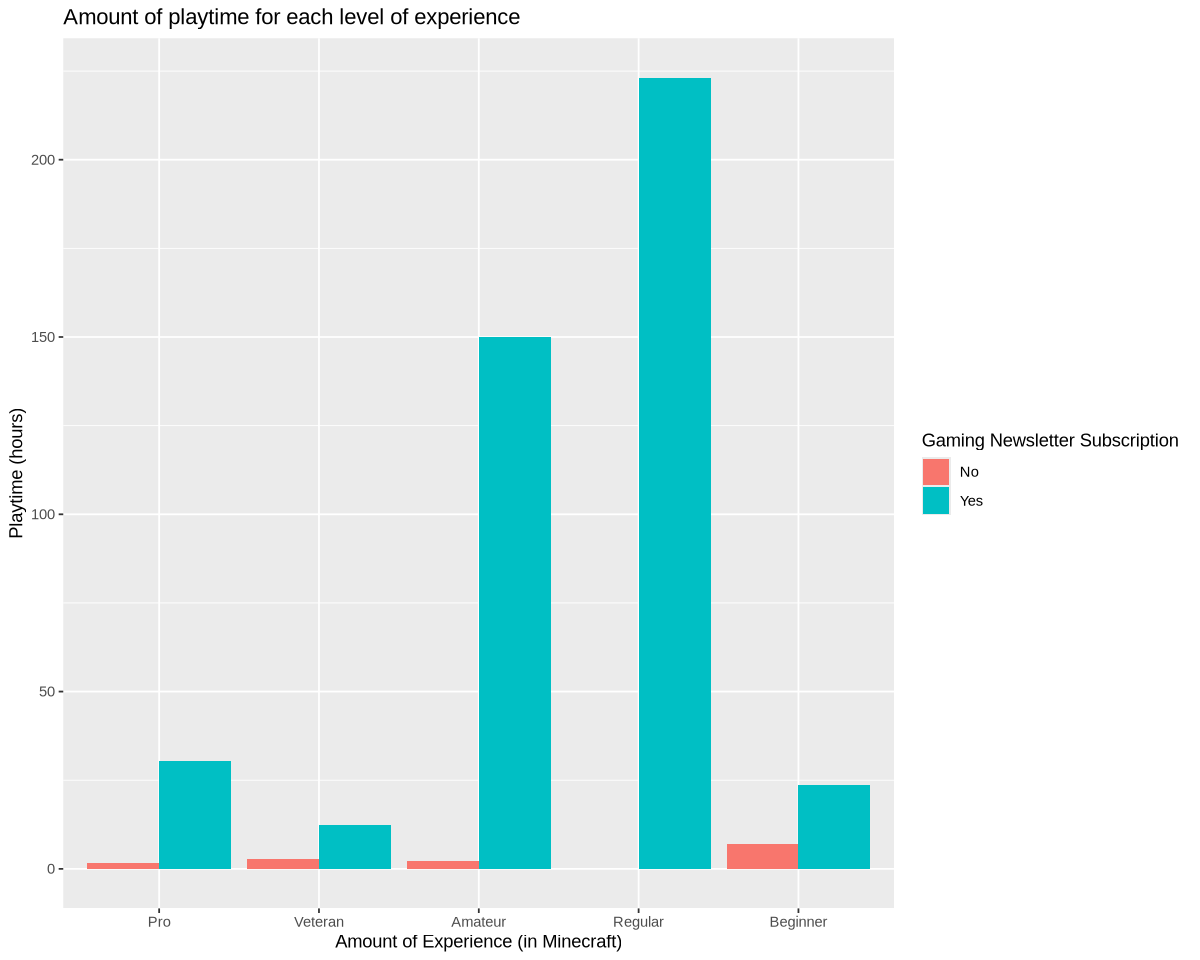

In [11]:
playtime <- ggplot(players, aes(x=experience, y=played_hours, fill=subscribe)) +
    geom_bar(stat="identity", position="dodge") +
    labs(x="Amount of Experience (in Minecraft)", y="Playtime (hours)", fill="Gaming Newsletter Subscription") +
    ggtitle("Amount of playtime for each level of experience")
playtime

The amount of people subscribed in every category trumps the ones who are not subscribed. The likely reason for this is that subscription is true by default. The user must unsubscribe on their own, which seems to be a step not many take.

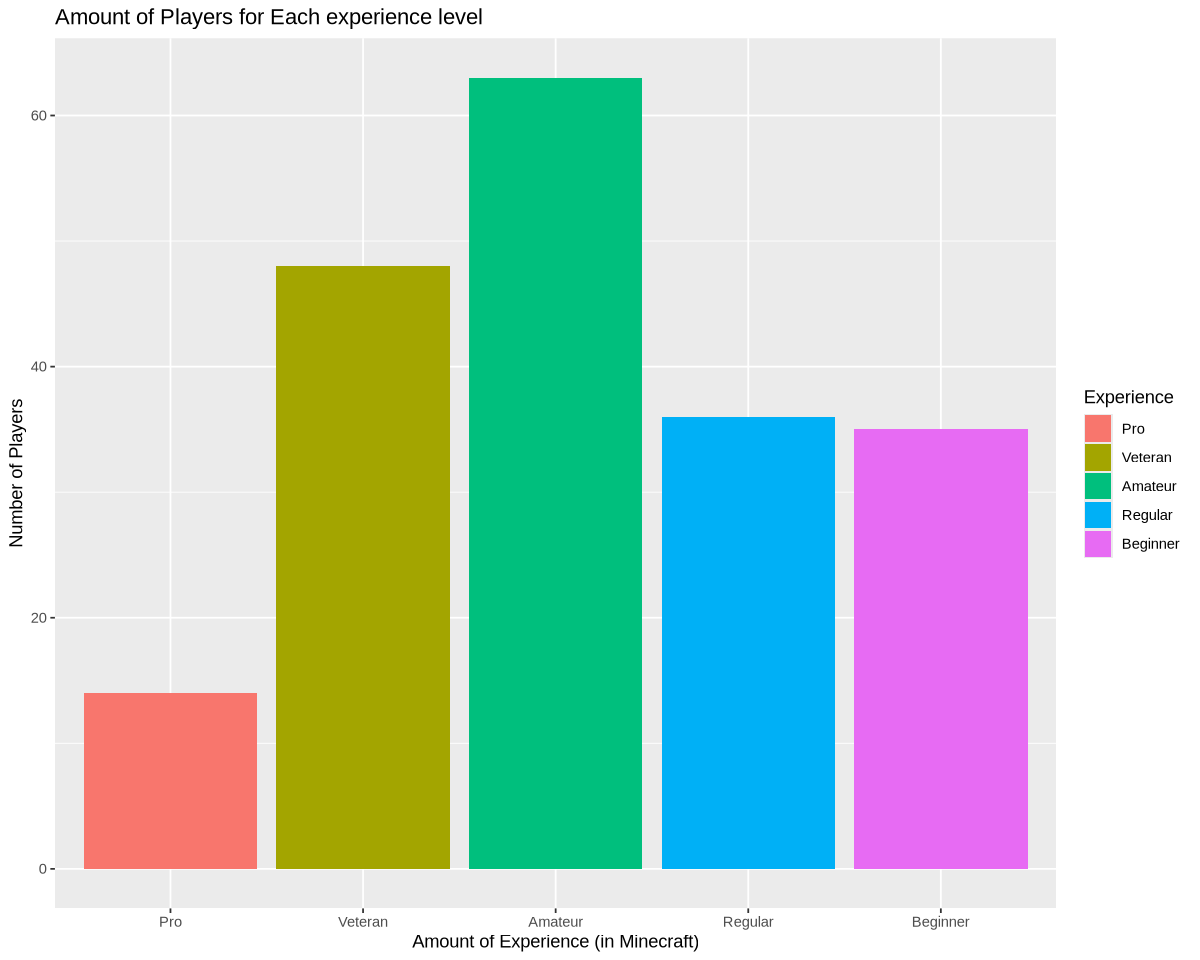

In [13]:
experience_count_plot <- ggplot(experience_count, aes(x=experience, y=count, fill=experience)) +
    geom_bar(stat="identity") +
    labs(x="Amount of Experience (in Minecraft)", y="Number of Players", fill="Experience") +
    ggtitle("Amount of Players for Each experience level")
experience_count_plot

Comparing this graph to the playtime graph, we can see large differences between total playtime and the number of players. For example, Veteran has the second most players, but the amount of playtime is the lowest. Furthermore, Regular has about half the users as Amateur, but about 33% more playtime.  
This may be useful later on, because while there may be a lot of one category, the hours per person may be low, or the opposite may be true for another category.

start_time,end_time,time
<dttm>,<dttm>,<dbl>
2024-06-27 22:21:00,2024-06-28 02:40:00,259
2024-08-06 23:48:00,2024-08-07 04:04:00,256
2024-07-17 00:51:00,2024-07-17 05:07:00,256
2024-08-29 01:17:00,2024-08-29 05:32:00,255
⋮,⋮,⋮
2024-06-21 18:19:00,2024-06-21 18:22:00,3
2024-08-27 17:06:00,NA,NA
2024-09-15 04:21:00,NA,NA


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


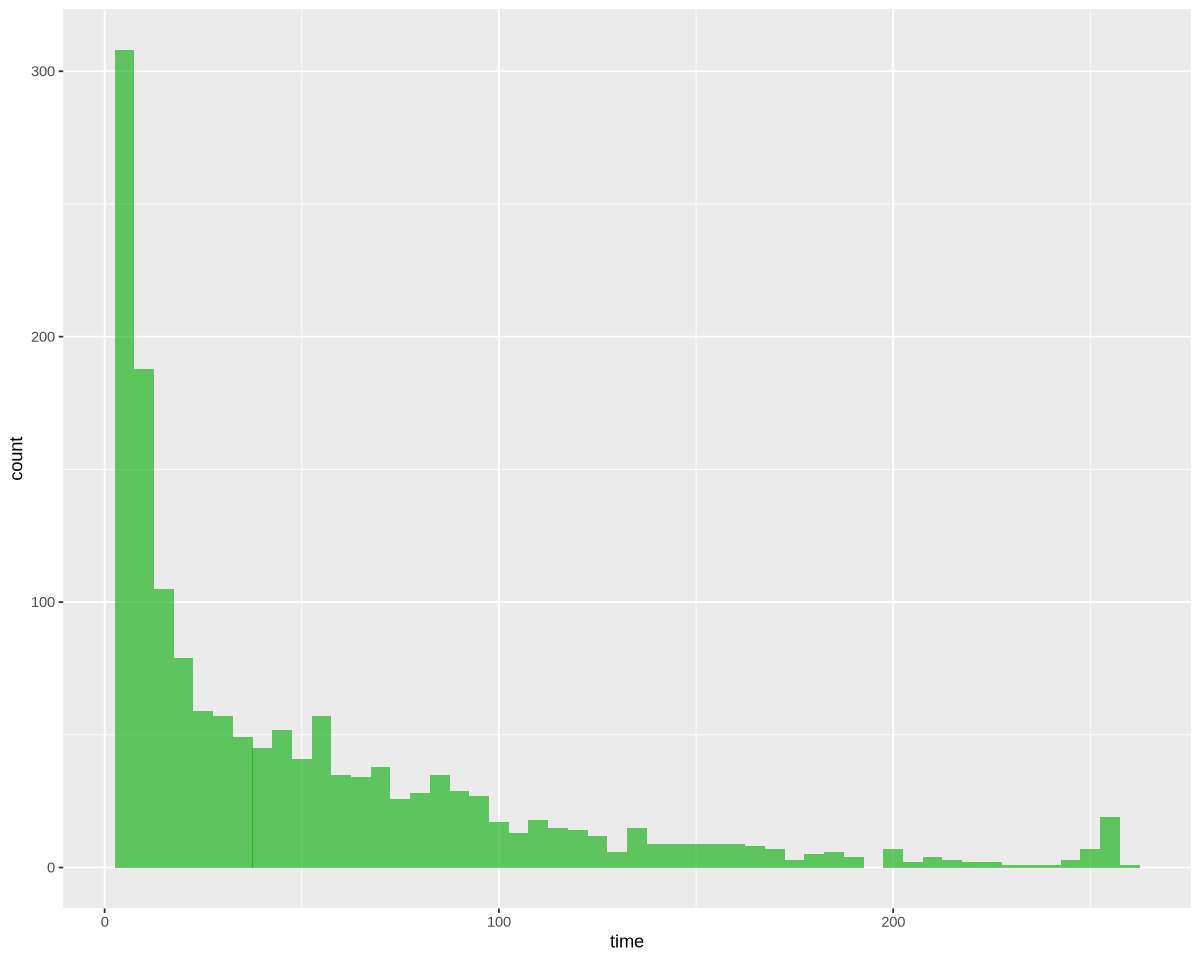

In [37]:
playtime_length <- sessions |>
    select(start_time, end_time) |>
    mutate(time = end_time - start_time) |>
    mutate(time = as.numeric(time)) |>
    arrange(-time)
playtime_length
playtime_length_plot <- ggplot(playtime_length, aes(x=time)) +
    geom_histogram(binwidth=5, fill="#00AA00", alpha=0.6)
playtime_length_plot

Finally, this histogram shows the playtime for each session. This is really interesting because there are so many people who just get on and immediately quit within five minutes. These sessions are not likely to contribute much data, so this may be useful for my analysis later.

## Methods:

A method that I could use is k-nn classification. I chose this because I am using multiple numeric pieces of data to predict a categorical one.  
In order to perform this classification, I will need to properly scale all of the data to ensure no factors dominate the calculation. I also have to bind the two tables together using the `hashedEmail` columns. The data will be split into three sets, a training, validation and testing set. The split will be 70/15/15, as it is a small dataset. I will also need to perform cross-validation to select a k-value that will ensure the most accurate predictions, and I will use 10 fold cross-validation.  
Some limitations include heavy dependence on choice of k, and worse scaling if this model is ever used in huge datasets.